In [27]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib.ticker as ticker
import sys
sys.path.insert(0, '/home/jenny/remote_learning_code_Spring_2017-2020')
from utils import parse_args

sys.argv = ['-f']
args = parse_args()

term_20 = args.semester_2020_Spring
start_date_20 = args.start_date_2020_Spring
remote_date_20 = args.remote_date_2020_Spring
end_date_20 = args.end_date_2020_Spring

term_19 = args.semester_2019_Spring
start_date_19 = args.start_date_2019_Spring
cutoff_date_19 = args.cutoff_date_2019_Spring
end_date_19 = args.end_date_2019_Spring

term_18 = args.semester_2018_Spring
start_date_18 = args.start_date_2018_Spring
cutoff_date_18 = args.cutoff_date_2018_Spring
end_date_18 = args.end_date_2018_Spring

term_17 = args.semester_2017_Spring
start_date_17 = args.start_date_2017_Spring
cutoff_date_17 = args.cutoff_date_2017_Spring
end_date_17 = args.end_date_2017_Spring

# load students
f = open('../user_id_groups.pkl', 'rb')
user = pickle.load(f)
students = user['student']

In [37]:
enrollments = pd.read_csv(args.enrollments, sep='\t', header=0)
enrollments = enrollments.loc[(enrollments['user_id'].isin(students))&(enrollments['enrollment_role_type']=='StudentEnrollment')]

In [38]:
enrollments = enrollments.loc[(enrollments['enrollment_state']=='deleted')&(enrollments['enrollment_updated_at'].notnull())]



In [58]:
def drop_out(enrollments, term, start_date, end_date):
    enrollment_term = enrollments.loc[(enrollments['term_name']==term)&(enrollments['enrollment_updated_at']>=start_date)&(enrollments['enrollment_updated_at']<=end_date)]
    enrollment_term['enrollment_updated_at'] = pd.to_datetime(enrollment_term['enrollment_updated_at'], format='%Y-%m-%d %H:%M:%S.%f').apply(lambda x: x.date())
    size = enrollment_term.groupby('enrollment_updated_at').size()
    size = size.reset_index()
    return size

In [59]:
time_20 = drop_out(enrollments, term_20, start_date_20, end_date_20)
time_19 = drop_out(enrollments, term_19, start_date_19, end_date_19)
time_18 = drop_out(enrollments, term_18, start_date_18, end_date_18)
time_17 = drop_out(enrollments, term_17, start_date_17, end_date_17)

-f:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [60]:
time_20.set_index('enrollment_updated_at', inplace=True)
time_19['enrollment_updated_at'] = time_19['enrollment_updated_at'].apply(lambda x: x.replace(year=2020))
time_19.set_index('enrollment_updated_at', inplace=True)
time_18['enrollment_updated_at'] = time_18['enrollment_updated_at'].apply(lambda x: x.replace(year=2020))
time_18.set_index('enrollment_updated_at', inplace=True)
time_17['enrollment_updated_at'] = time_17['enrollment_updated_at'].apply(lambda x: x.replace(year=2020))
time_17.set_index('enrollment_updated_at', inplace=True)

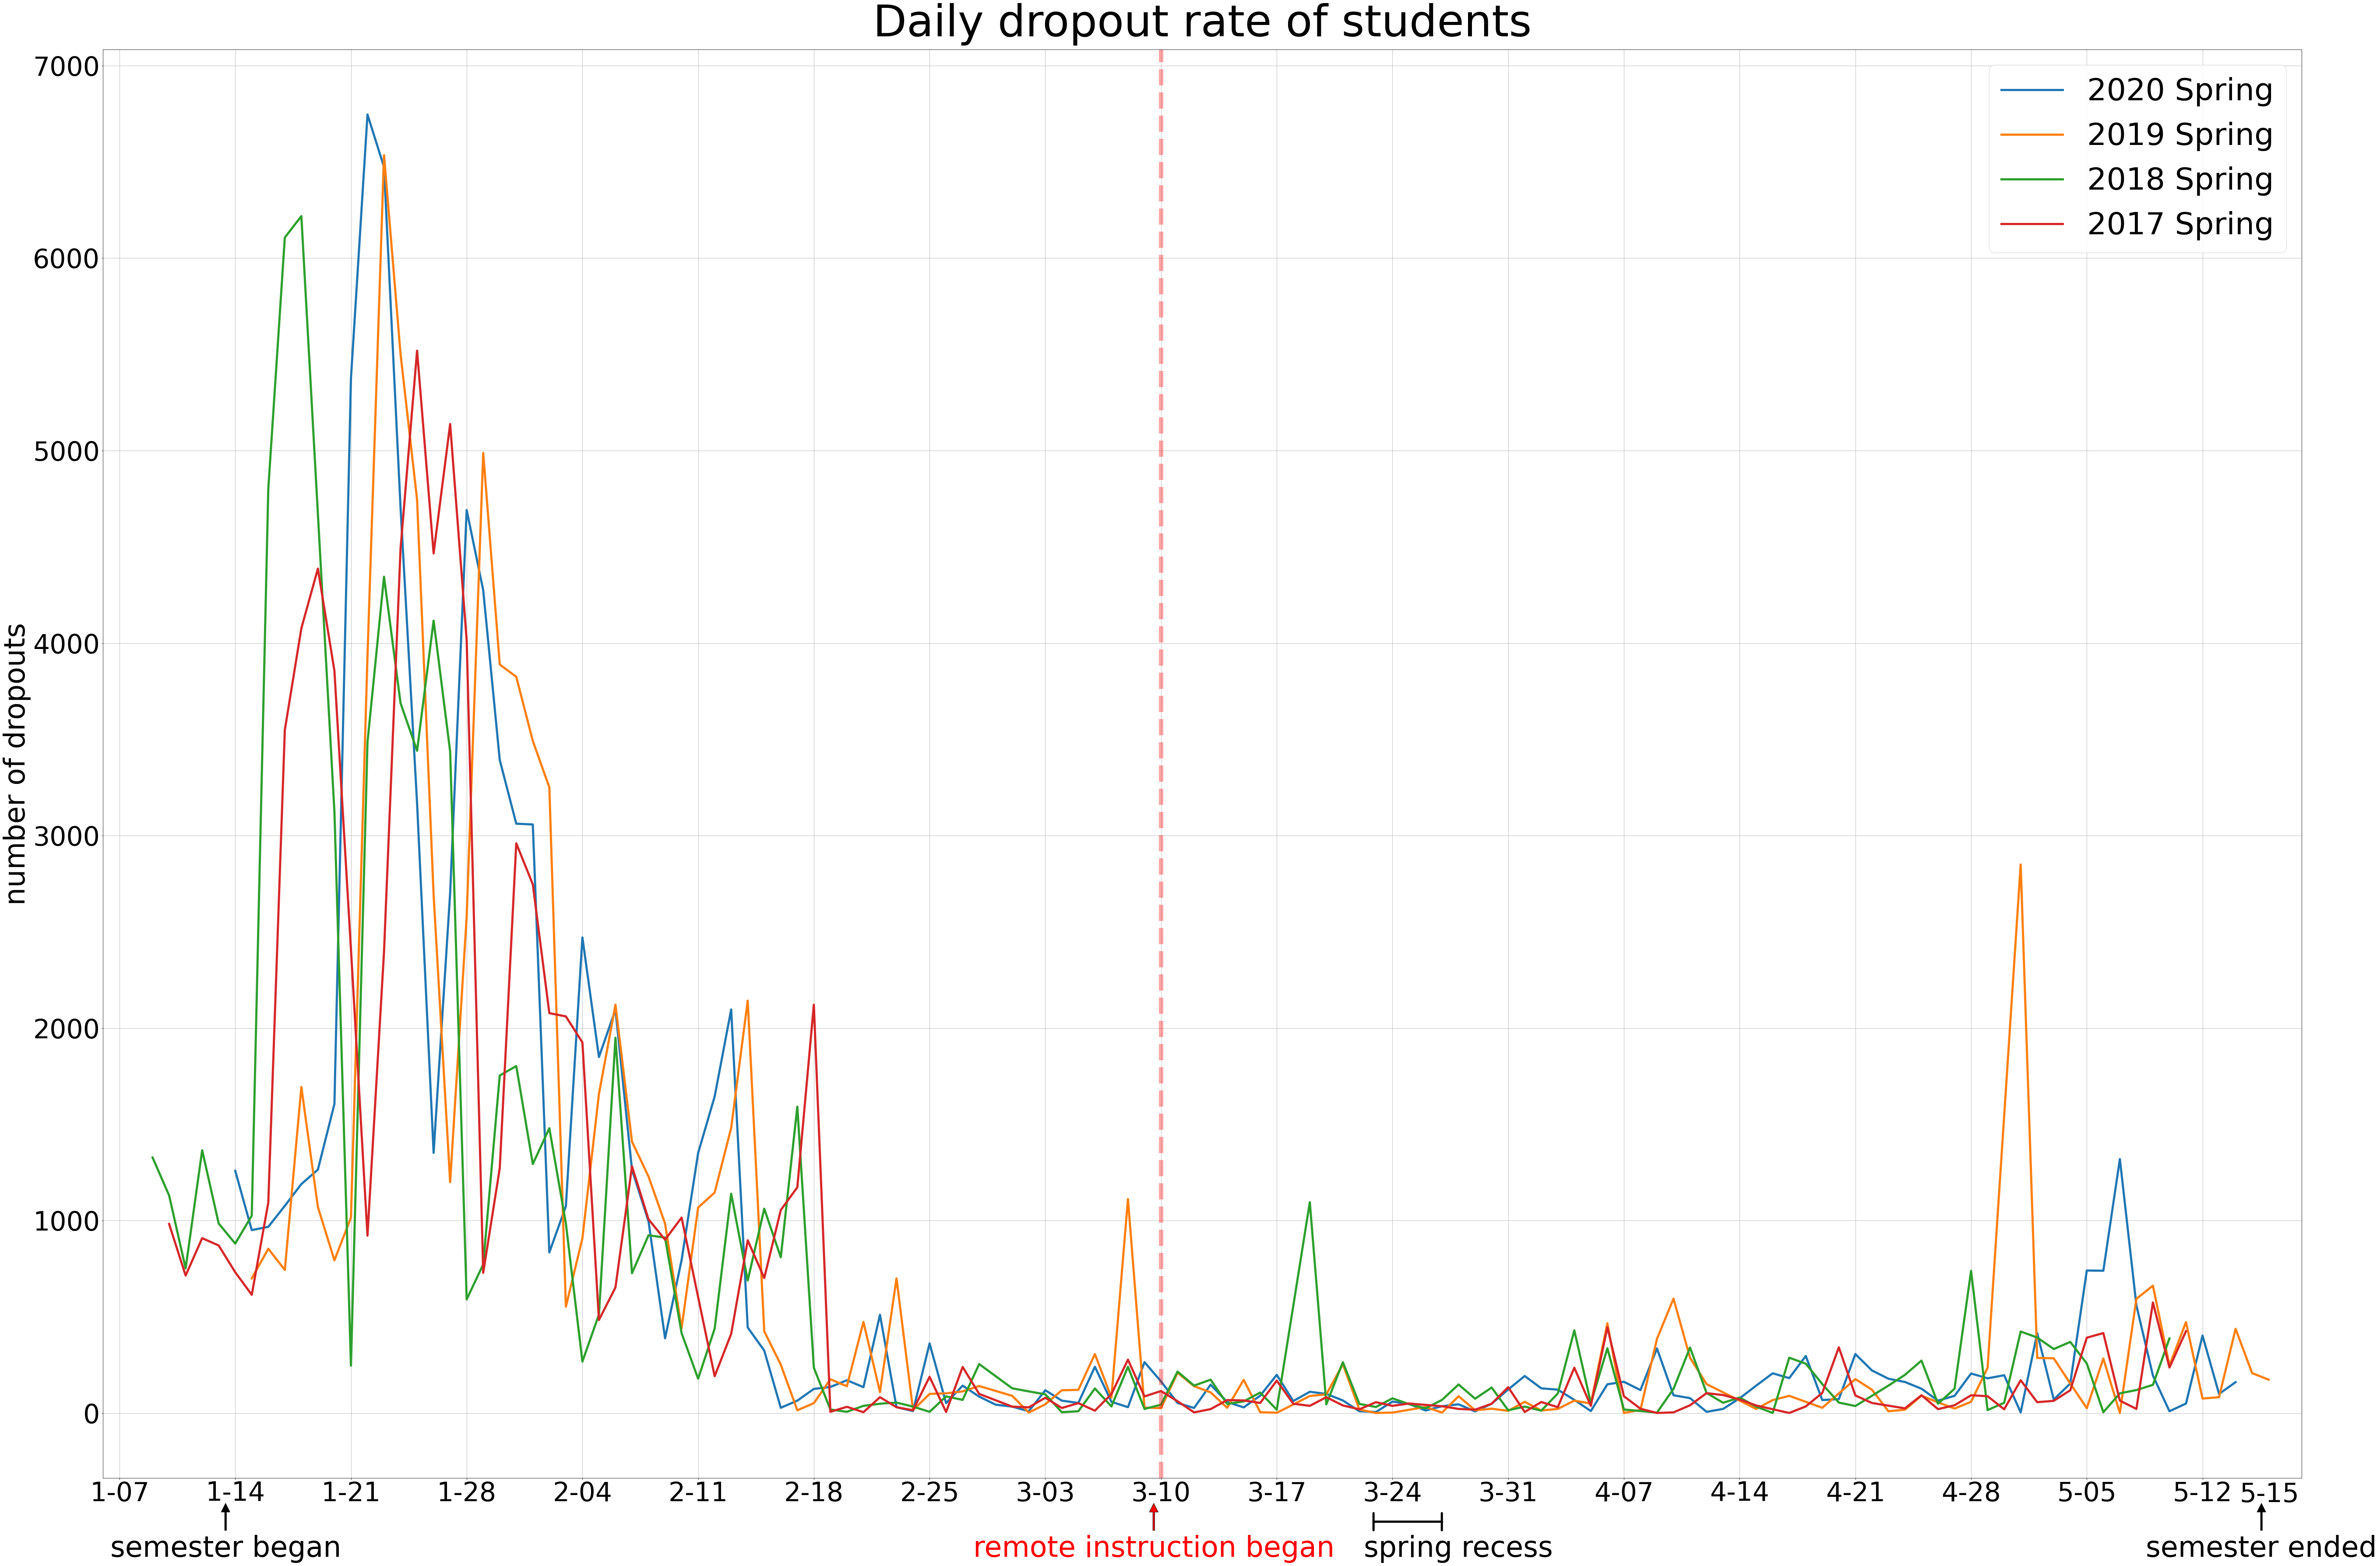

In [61]:
# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(time_20, linewidth=5.0, label='2020 Spring')
plt.plot(time_19, linewidth=5.0, label='2019 Spring')
plt.plot(time_18, linewidth=5.0, label='2018 Spring')
plt.plot(time_17, linewidth=5.0, label='2017 Spring')

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Daily dropout rate of students', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of dropouts', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
plt.legend(prop={'size': 70})
plt.show()



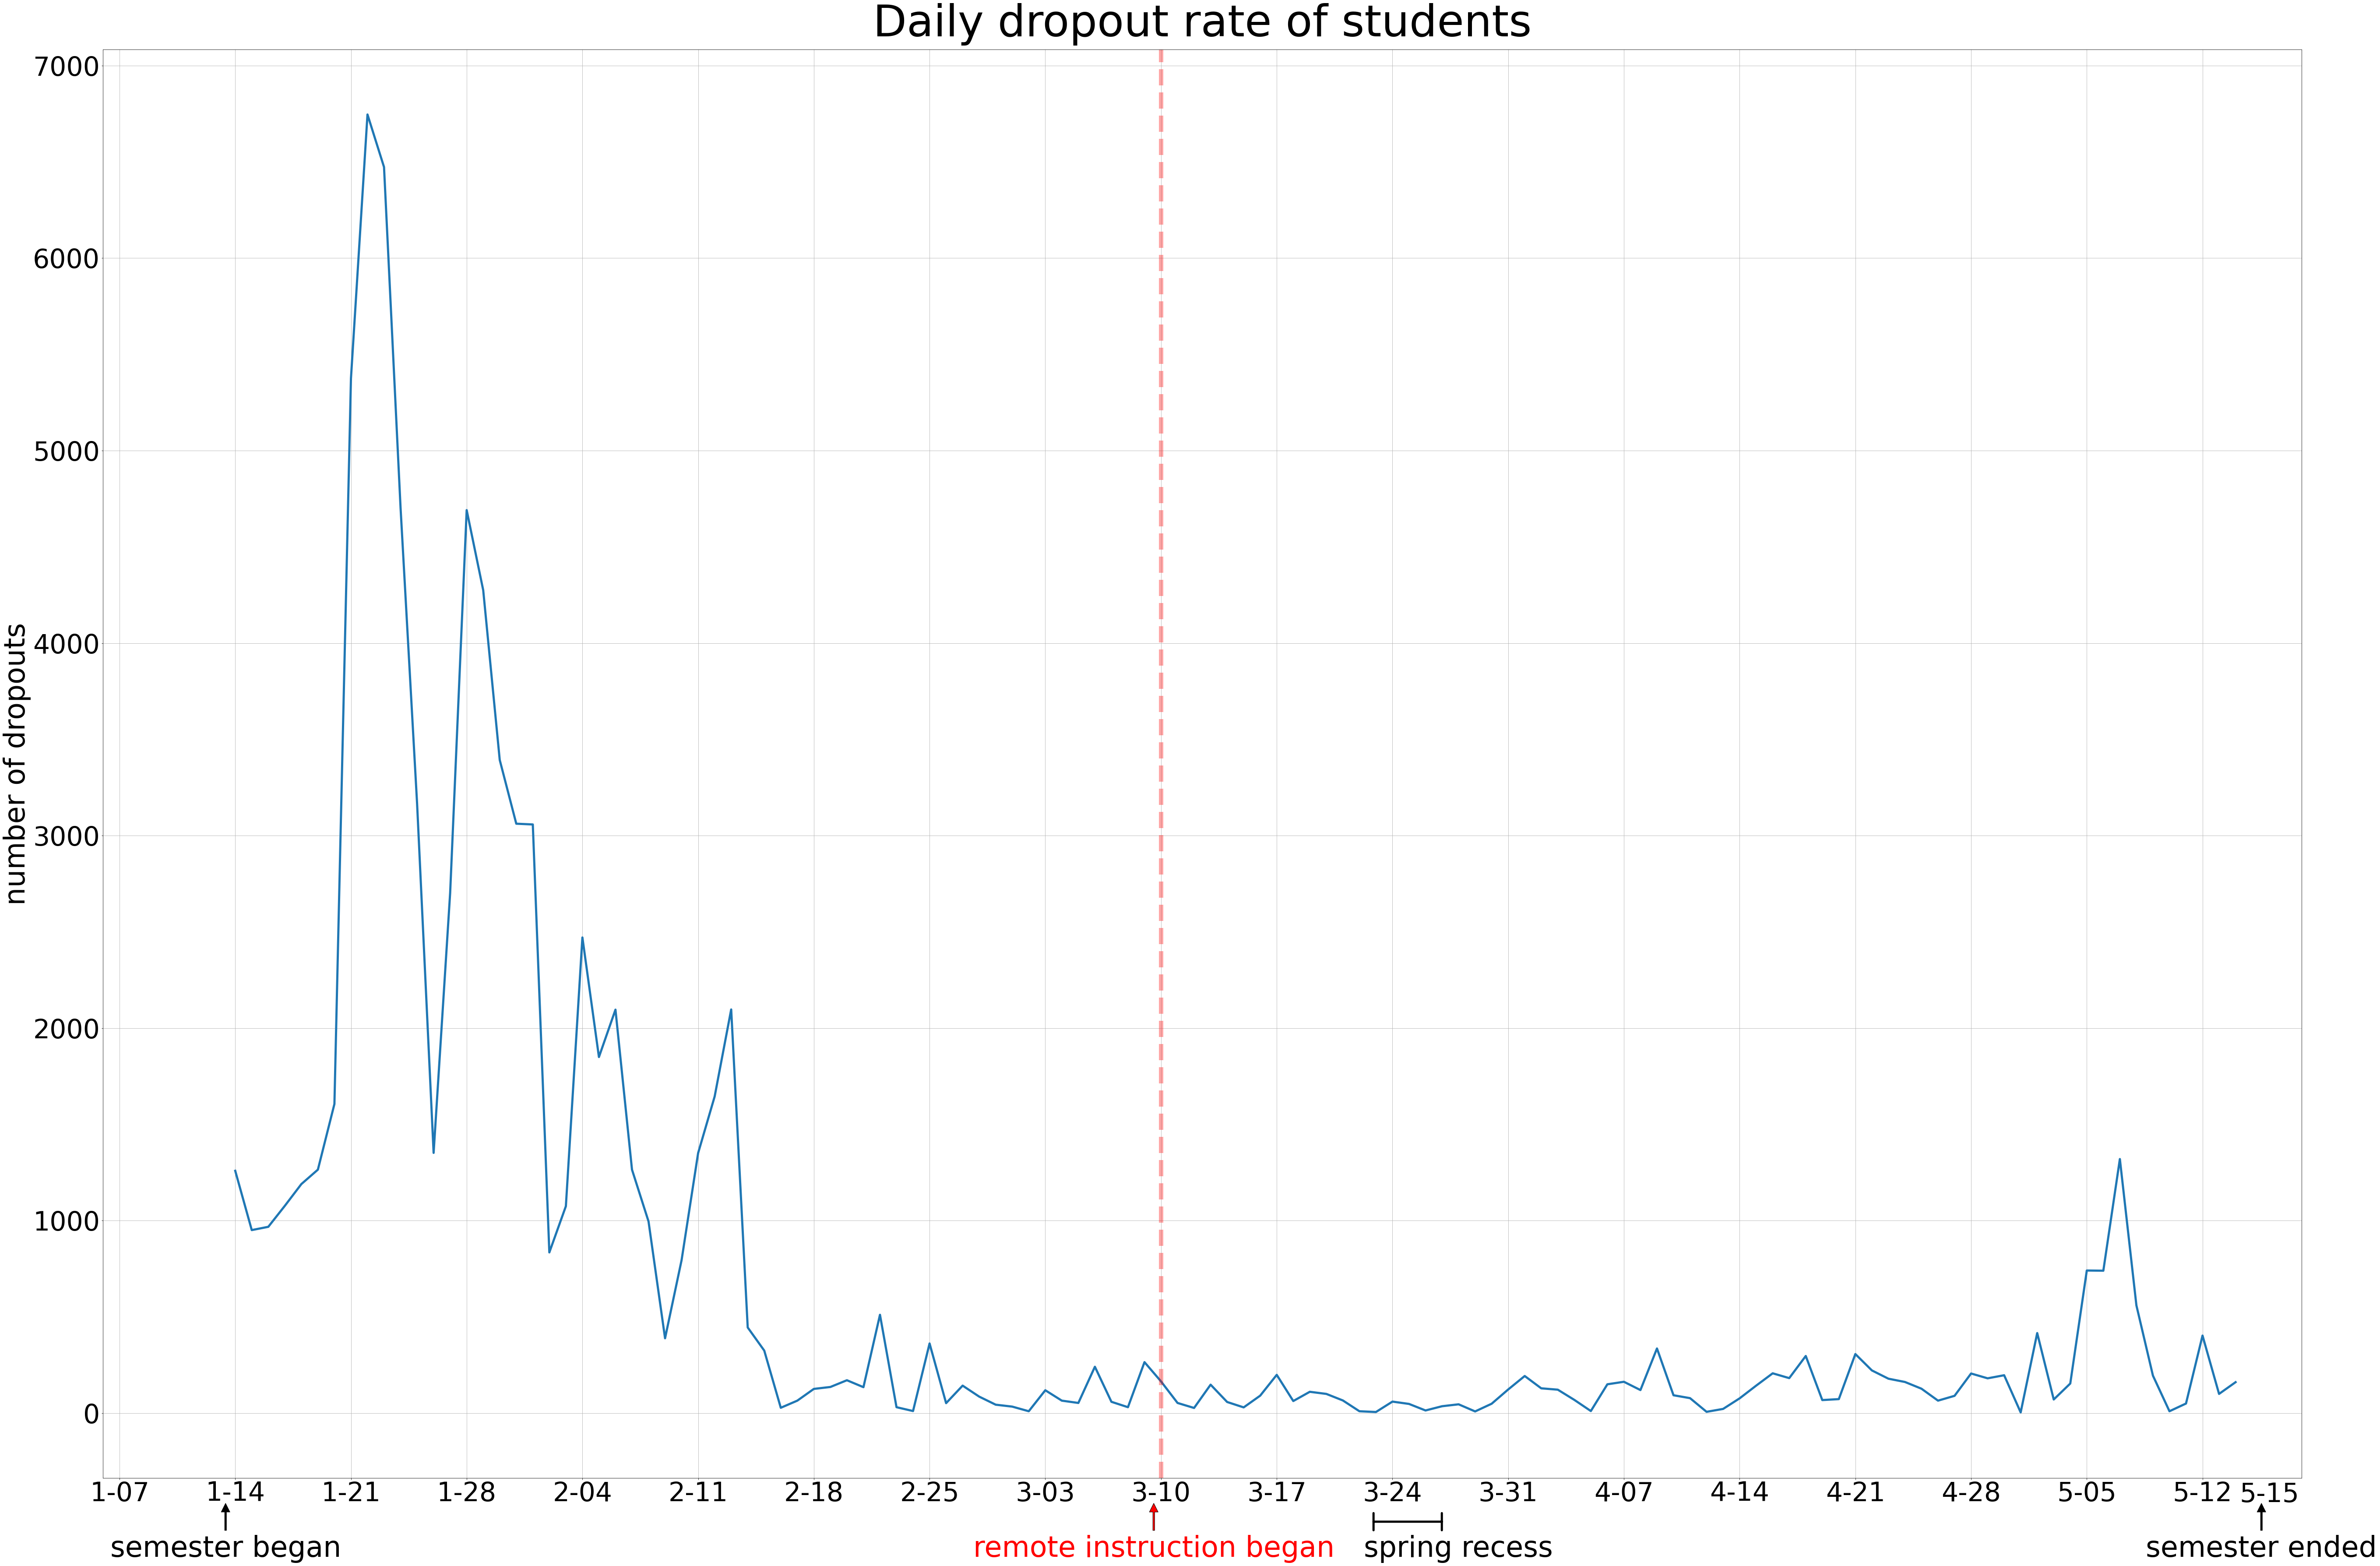

In [62]:
# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(time_20, linewidth=5.0, label='2020 Spring')
plt.plot(time_19, linewidth=5.0, label='2019 Spring', alpha=0)
plt.plot(time_18, linewidth=5.0, label='2018 Spring', alpha=0)
plt.plot(time_17, linewidth=5.0, label='2017 Spring', alpha=0)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Daily dropout rate of students', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of dropouts', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
#plt.legend(prop={'size': 70})
plt.show()



In [45]:
print(time_19)

                          0
enrollment_updated_at      
2020-01-15              700
2020-01-16              854
2020-01-17              744
2020-01-18             1694
2020-01-19             1071
...                     ...
2020-04-25                2
2020-05-24               35
2020-05-25                1
2020-05-29                2
2020-06-30                3

[291 rows x 1 columns]


In [46]:
print(time_20)

                          0
enrollment_updated_at      
2020-01-14             1259
2020-01-15              951
2020-01-16              968
2020-01-17             1077
2020-01-18             1190
...                     ...
2021-05-24                5
2021-06-09               36
2021-06-11                7
2021-06-30                6
2021-07-01               37

[257 rows x 1 columns]


In [47]:
print(time_18)

                          0
enrollment_updated_at      
2020-01-09             1328
2020-01-10             1131
2020-01-11              752
2020-01-12             1366
2020-01-13              985
...                     ...
2020-02-04               91
2020-04-22              392
2020-05-24               55
2020-06-03               13
2020-06-16                3

[300 rows x 1 columns]


In [48]:
print(time_17)

                         0
enrollment_updated_at     
2020-01-10             983
2020-01-11             715
2020-01-12             909
2020-01-13             871
2020-01-14             732
...                    ...
2020-01-21              22
2020-02-08               5
2020-03-10              12
2020-03-19              11
2020-06-30               6

[331 rows x 1 columns]


In [50]:
for i in time_17:
    print(time_17.idx(i))

AttributeError: 'DataFrame' object has no attribute 'idx'